In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img1= cv2.imread("a1.jpg" , 0)
img2= cv2.imread("a2.jpg" , 0)
img3= cv2.imread("a3.jpg" , 0)

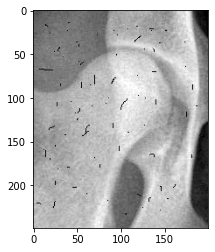

In [4]:
plt.imshow(img3,"gray")

# Median Filter

Applies a median filter to an image. The median filter is defined as the median of all pixels within a local region of an image.

The median filter is normally used to reduce salt and pepper noise in an image, somewhat like the mean filter. However, it often does a better job than the mean filter of preserving useful detail in the image.

In [5]:
# You Answer
def median_filter(img):
    pad = 1
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    filter = (3,3)
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]=np.median(padding[i:i+filter[0] , j:j+filter[1]])
    plt.imshow(final_img,"gray")

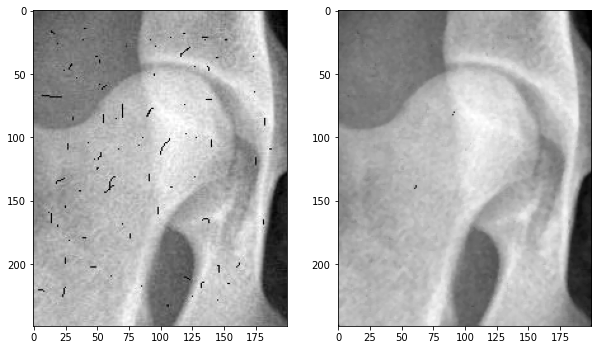

In [6]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 2, 2)
median_filter(img3)

# Arithmetic Mean Filter

Applies a arithmetic mean filter to an image.

An arithmetic mean filter operation on an image removes short tailed noise such as uniform and Gaussian type noise from the image at the cost of blurring the image. The arithmetic mean filter is defined as the average of all pixels within a local region of an image.

Pixels that are included in the averaging operation are specified by a mask. The larger the filtering mask becomes the more predominant the blurring becomes and less high spatial frequency detail that remains in the image.

In [7]:
# You Answer
def Arithmetic_filter(img):
    pad = 1
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    filter = (3,3)
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]=np.mean(padding[i:i+filter[0] , j:j+filter[1]])
    plt.imshow(final_img,"gray")

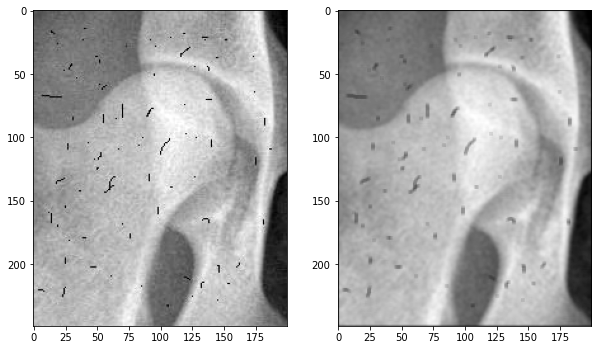

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 2, 2)
Arithmetic_filter(img3)

# Geometric Mean Filter

Applies a geometric mean filter to an image.

In the geometric mean method, the color value of each pixel is replaced with the geometric mean of color values of the pixels in a surrounding region. 

The geometric mean filter is better at removing Gaussian type noise and preserving edge features than the arithmetic mean filter. The geometric mean filter is very susceptible to negative outliers.

The geometric mean filter is better at removing Gaussian type noise and preserving edge features than the arithmetic mean filter. The geometric mean filter is very susceptible to negative outliers.

In [9]:
# You Answer
from scipy.stats import gmean
def geometric_mean_filter(img):
    pad = 1
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    filter = (3,3)
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]=gmean((padding[i:i+filter[0] , j:j+filter[1]]).ravel())
    plt.imshow(final_img,"gray")

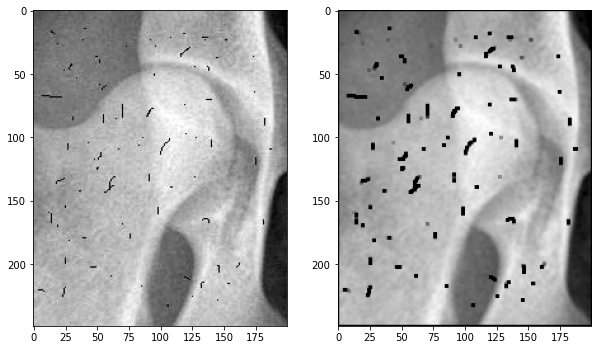

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 2, 2)
geometric_mean_filter(img3)

# Harmonic Mean Filter

Applies a harmonic mean filter to an image.

In the harmonic mean method, the color value of each pixel is replaced with the harmonic mean of color values of the pixels in a surrounding region.
The harmonic mean filter is better at removing Gaussian type noise and preserving edge features than the arithmetic mean filter. The harmonic mean filter is very good at removing positive outliers.

In [11]:
# You Answer
from scipy.stats import hmean
def harmonic_mean_filter(img):
    pad = 1
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    filter = (3,3)
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]=hmean((padding[i:i+filter[0] , j:j+filter[1]]).ravel())
    plt.imshow(final_img,"gray")


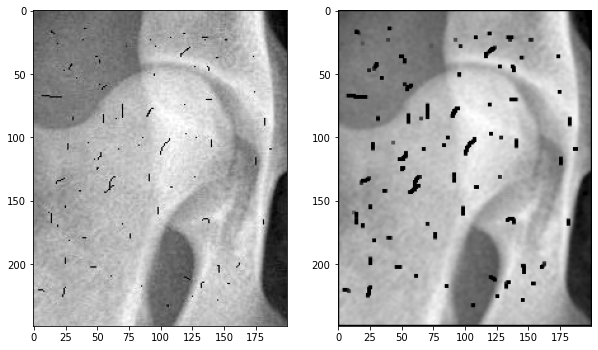

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 2, 2)
harmonic_mean_filter(img3)

# Contraharmonic Mean Filter

Applies a contraharmonic mean filter to an image.

With a contraharmonic mean filter, the color value of each pixel is replaced with the contraharmonic mean of color values of the pixels in a surrounding region.

A contraharmonic mean filter reduces or virtually eliminates the effects of salt-and-pepper noise. For positive values of Q, the filter eliminates pepper noise. For negative values of Q it eliminates salt noise. It cannot do both simultaneously.

Note that the contraharmonic filter is simply the arithmetic mean filter if Q = 0, and the harmonic mean filter if Q = −1.

In [13]:
# You Answer
# You Answer
from scipy.stats import hmean
def contraharmonic_mean_filter(img,Q, pad = 1 , filter = (3,3)):
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]=np.sum((padding[i:i+filter[0] , j:j+filter[1]])**(Q+1)) / np.sum((padding[i:i+filter[0] , j:j+filter[1]])**(Q))
    plt.imshow(final_img,"gray")

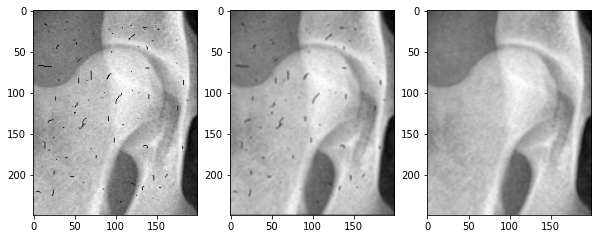

In [14]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 3, 2)
contraharmonic_mean_filter(img3,0, pad = 1 , filter = (3,3))
plt.subplot(1, 3, 3)
contraharmonic_mean_filter(img3,2, pad = 1 , filter = (3,3))

# Maximum Filter

Applies a maximum filter to an image. The maximum filter is defined as the maximum of all pixels within a local region of an image.

The maximum filter is typically applied to an image to remove negative outlier noise.

In [15]:
# You Answer
def maximum_filter(img):
    pad = 1
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    filter = (3,3)
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]=(padding[i:i+filter[0] , j:j+filter[1]]).max()
    plt.imshow(final_img,"gray")

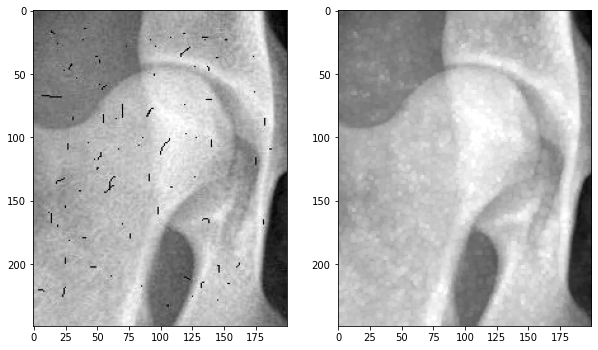

In [16]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 2, 2)
maximum_filter(img3)

# Minimum Filter

Applies a minimum filter to an image. The minimum filter is defined as the minimum of all pixels within a local region of an image.

The minimum filter is typically applied to an image to remove positive outlier noise.

In [17]:
# You Answer
def minimum_filter(img):
    pad = 1
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    filter = (3,3)
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]=(padding[i:i+filter[0] , j:j+filter[1]]).min()
    plt.imshow(final_img,"gray")

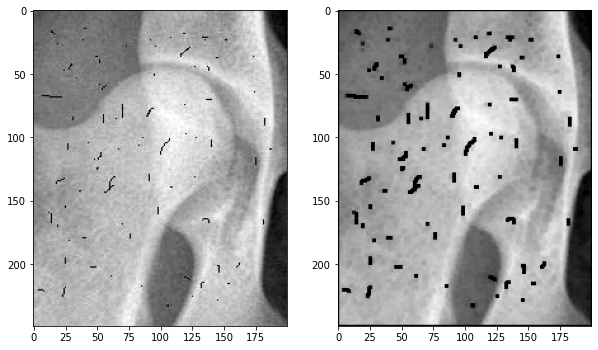

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 2, 2)
minimum_filter(img3)

# Midpoint Filter

Applies a midpoint filter to an image.

In the midpoint method, the color value of each pixel is replaced with the average of maximum and minimum (i.e. the midpoint) of color values of the pixels in a surrounding region. A larger region (filter size) yields a stronger effect.

The midpoint filter is typically used to filter images containing short tailed noise such as Gaussian and uniform type noise.

In [19]:
# You Answer
def midpoint_filter(img):
    pad = 1
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    filter = (3,3)
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]= ((padding[i:i+filter[0] , j:j+filter[1]]).max() + (padding[i:i+filter[0] , j:j+filter[1]]).min())/2
    plt.imshow(final_img,"gray")




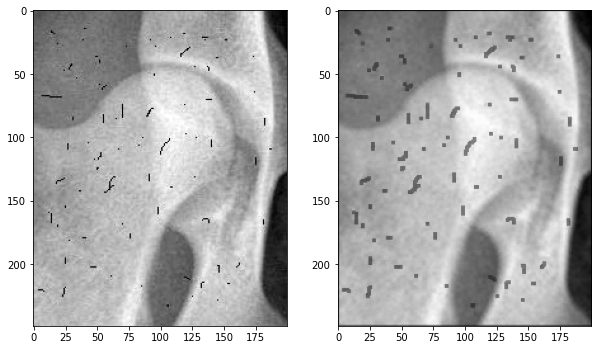

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 2, 2)
midpoint_filter(img3)

# Yp Mean Filter

Applies a Yp Mean filter to an image.

The Yp mean filter is member of a set of nonlinear mean filters which are better removing Gaussian type noise and preserving edge features than the arithmetic mean filter. Yp mean filter is very good at removing positive outliers for negative values of P and negative outliers for positive values of P (Power)


In [21]:
# You Answer



# Range Filter

Applies a Range filter to an image.

In the range method, the color value of each pixel is replaced with the difference of maximum and minimum (i.e. the range) of color values of the pixels in a surrounding region.

The range filter is used to find edges within an image.

In [22]:
# You Answer
def Range_filter(img):
    pad = 1
    padding = np.zeros((img.shape[0]+(pad*2) , img.shape[1]+(pad*2)))
    padding[pad:-pad,pad:-pad] = img
    filter = (3,3)
    final_img =  np.zeros((img.shape[0]+(pad*2) -filter[0] +1 , img.shape[1]+(pad*2)-filter[1] +1))
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            final_img[i,j]=((padding[i:i+filter[0] , j:j+filter[1]]).max() - (padding[i:i+filter[0] , j:j+filter[1]]).min())  
    plt.imshow(final_img,"gray")


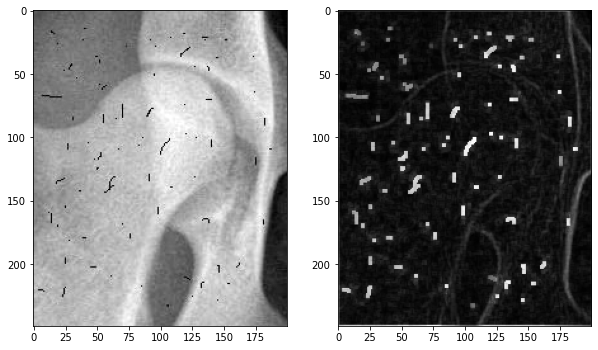

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img3,"gray")
plt.subplot(1, 2, 2)
Range_filter(img3)

# Emboss Filter

Generates an embossed image.

Image embossing is a computer graphics technique in which each pixel of an image is replaced either by a highlight or a shadow, depending on light/dark boundaries on the original image. Low contrast areas are replaced by a gray background.

In [24]:
def convolution(img,kernel):
    
    row = img.shape[0] - len(kernel) + 1
    col = img.shape[1] - len(kernel[0]) + 1
    filtered_img = np.zeros(shape=(row,col))
    for i in range(row):
        for j in range(col):
            current = img[i:i+len(kernel) , j:j+len(kernel[0])]
            mul = np.sum(current * kernel)
            filtered_img[i,j] = mul
            
    cv2.imshow("filtered_img" , filtered_img)
    cv2.waitKey(0)
